In [19]:
import sys
import numpy as np
import numpy.linalg as la 
import pandas as pd
from sklearn.preprocessing import normalize
from oct2py import octave
from pandas import DataFrame
from matplotlib import pyplot as plt 
from itertools import permutations, product
import random
import math
from scipy.optimize import linear_sum_assignment as lasum
from mpl_toolkits import mplot3d
import seaborn as sns
import scipy
from sklearn.neighbors import KernelDensity

def plusAndMinusPermutations(items):
    for p in permutations(items):
        for signs in product([-1,1], repeat=len(items)):
            yield [a*sign for a,sign in zip(p,signs)]

def Frobenius_Norm(A, A_):
    return np.sqrt(np.trace(np.subtract(A, A_)@np.subtract(A,A_).conj().T))
octave.addpath('~/Github/NSF-Phase1/Blaine/fastica');

def support(X, val, q): # Set q to be the qth quantile
    return np.quantile((X.T).dot(val), q)

def compute_fb(X, q, n):
    polar_body = np.ones((n,0))
    for i in range(X.shape[1]):
        if support(X, X[:,i] / la.norm(X[:,i]), q) > np.dot(X[:,i], X[:,i]/la.norm(X[:,i])): 
            polar_body = np.hstack((polar_body, np.array(X[:,i]).reshape(n,1)))
    return polar_body

def Get_Min(A,A_):
    weights = -abs((A.T@A_)**2)
    ind = octave.munkres(weights)
    print(ind)
    fs = [int(x) - 1 for x in list(ind[0])]
    B = A_[:, fs]
    innerprod = np.diag(np.real(A.T@B) < 0)
    B[:,innerprod] = -B[:, innerprod]
    min_ = Frobenius_Norm(B, A)
    return min_ 

def ell_1(n):
    U = np.random.uniform(0,1,n)
    tmp = np.array([0,1])
    Final = np.zeros(n)
    U = np.hstack((U,tmp))
    U = np.sort(U)
    for i in range(1,n+1):
        Final[i-1] = U[i] - U[i-1]
    Final = np.reshape(Final, (n,1))
    for j in range(n):
        binom = np.random.binomial(1,.5)
        if(binom == 1):
            Final[j] = Final[j]*(-1)
    return Final

def simplex(n):
    U = np.random.uniform(0,1,n)
    tmp = np.array([0,1])
    Final = np.zeros(n)
    U = np.hstack((U,tmp))
    U = np.sort(U)
    for i in range(1,n+1):
        Final[i-1] = U[i] - U[i-1]
    Final = np.reshape(Final, (n,1))
    return Final

def moment(A, scale):
    temp = A
    thetas = np.arange(0, 2.1*math.pi, .1)
    moments = np.zeros(thetas.shape)
    lines = np.zeros((2, thetas.shape[0]))
    for i in range(thetas.shape[0]):
        vect = np.array([[np.sin(thetas[i]), np.cos(thetas[i])]])
        m = (1/samples) * np.sum((vect@temp)**1)
        moments[i] = m

    for i in range(thetas.shape[0]):
        x = moments[i]*np.cos(thetas[i])
        y = moments[i]*np.sin(thetas[i])
        lines[0,i] = scale*x
        lines[1,i] = scale*y
    return lines

def obtain_samples_simplex(samples, n, p_):
    S = np.zeros((n, 1))
    for i in range(samples):
        choice = np.random.choice(2, 1, p=[p_, 1-p_])
        if(choice == 0):
            S = np.hstack((S, simplex(n)))
        if(choice == 1):
            S = np.hstack((S,np.random.standard_cauchy((n,1))))
            #S = np.hstack((S, np.random.pareto(3,(n,1))))
    S = np.delete(S, 0,1)
    mean = np.mean(S)
    S = S - mean
    return S, mean

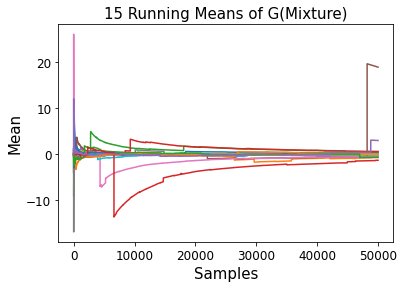

In [14]:
samples = 50000
for runs in range(0,15,1):
    Final_Mean_Gamma = np.zeros(samples)
    n = 2
    S = np.zeros((n, 1))
    p_ = .9
    for i in range(samples):
        choice = np.random.choice(2, 1, p=[p_, 1-p_])
        if(choice == 0):
            S = np.hstack((S, ell_1(n)))
        if(choice == 1):
            S = np.hstack((S,np.random.standard_cauchy((n,1))))
    S = np.delete(S, 0,1)
    A = np.array([[1,0],[0,1]])
    X_ = A@S
    T = np.random.gamma(((X_.shape[0])/1)+1, 1, (1,X_.shape[1]))
    Q = X_ * np.tile(T**(1/1),(X_.shape[0],1))
    for i in range(1,samples):
        Final_Mean_Gamma[i] = np.mean(Q[:,0:i])
    plt.plot([i for i in range(samples)], Final_Mean_Gamma)
plt.title("15 Running Means of G(Mixture)", fontsize=15)
plt.xlabel("Samples", fontsize=15)
plt.ylabel("Mean", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

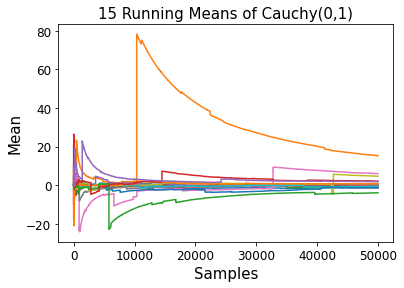

In [15]:
samples = 50000
for runs in range(0,15,1):
    Final_Mean_Cauchy = np.zeros(samples)
    cauchy = np.random.standard_cauchy((n,samples))
    for i in range(1,samples):
        Final_Mean_Cauchy[i] = np.mean(cauchy[:, 0:i])
    plt.plot([i for i in range(samples)], Final_Mean_Cauchy)
plt.title("15 Running Means of Cauchy(0,1)", fontsize=15)
plt.xlabel("Samples", fontsize=15)
plt.ylabel("Mean", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [29]:
cauchy = np.random.standard_cauchy((n,samples))
for i in range(0,samples):
    Final_Mean_Cauchy[i] = np.mean(cauchy[:, 0:i])

In [27]:
np.mean(cauchy[:, 0:100000])

2.826336427468101

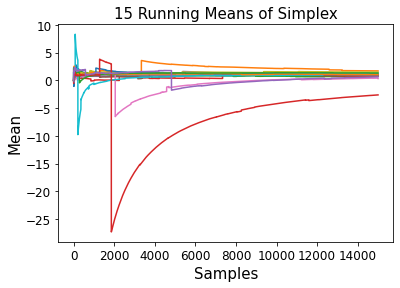

In [24]:
for runs in range(0,15,1):
    Final_Mean_Simplex = np.zeros(samples)
    samples = 15000
    n = 2
    S = np.zeros((n, 1))
    S, mean = obtain_samples_simplex(samples, n, percent)
    V = np.hstack((np.zeros((n,1)),np.eye(n,n))) - mean
    A = np.random.normal(0,1,(n,n))
    sqrt = np.sqrt(np.sum(A**2, axis = 0))
    A = A  / (np.tile(sqrt,(n,1)))
    
    #A = np.array([[1,0],[0,1]])
    X = A@S
    V = A@V
        
    X = np.vstack([X, np.ones((1,X.shape[1]))])
    
    T = np.random.gamma(X.shape[0], 1, (1,X.shape[1]))
    Q = X * np.tile(T,(X.shape[0],1))
    for i in range(1,samples):
            Final_Mean_Simplex[i] = np.mean(Q[:,0:i])
    plt.plot([i for i in range(samples)], Final_Mean_Simplex)
plt.title("15 Running Means of Simplex", fontsize=15)
plt.xlabel("Samples", fontsize=15)
plt.ylabel("Mean", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()